# Preparações iniciais

In [122]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Ativando o pretty printing do sympy
from sympy import init_printing
init_printing(order='none')

# Resoluções

## Cálculo do Volume
- Método dos discos e arruelas: $V=\pi\int_a^b y^2dx$
- Método da casca cilíndrica: $V=\int_a^b 2\pi x\cdot f(x)dx$

## Questão 1
$y=x^3\:;\:[1,2]$

In [123]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y = x**3

# Calculando o volume
V = sp.pi*sp.integrate(y**2, (x, 1, 2))
V

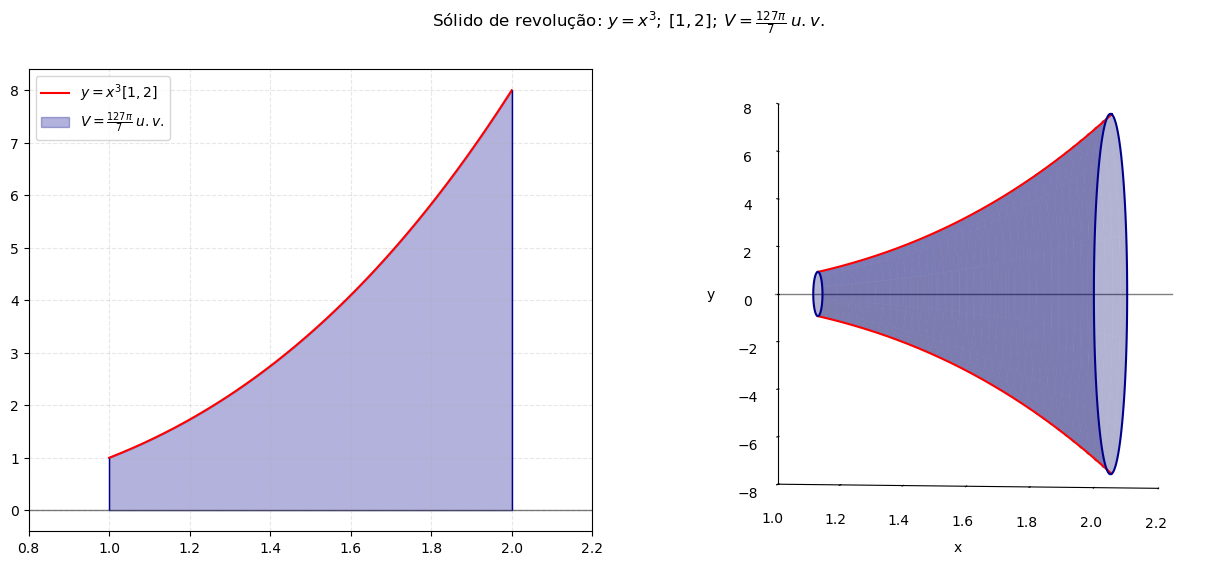

In [124]:
# Plotando o gráfico

# Criando funções lambda para plotar
y_lambda = sp.lambdify(x, y, 'numpy')
# x_vals
x_vals = np.linspace(1, 2, 400)
# y_vals
y_vals = y_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 6))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y_vals, label=r'$y=x^3 [1,2]$', color="red")
# Fill
ax1.fill_between(x_vals, y_vals, label=r'$V=\frac{127\pi}{7}\:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.vlines([1, 2], [0, 0], [1, 8], color='darkblue', linewidth=1, linestyle='-')
# Diminuindo a escala
ax1.set_xlim(0.8, 2.2)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
Y = y_lambda(X) * np.cos(T)
Z = y_lambda(X) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='blue', alpha=0.3, rstride=10, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
for xi in [1, 2]:
    yi = y_lambda(xi)
    theta_circ = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='darkblue', zorder=3)
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=8, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.3) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(1, 2.2)
ax2.set_ylim(-8, 8)
ax2.set_zlim(-8, 8)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(0.85, 2.2, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y=x^3;\:[1,2];\:V=\frac{127\pi}{7}\:u.v.$')
plt.show()

## Questão 2
$y=\frac{1}{2}x^2+1\:;\:x=0\:;\:x=2\:;\:[0,2]$

In [125]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y = sp.Rational(1, 2)*x**2 + 1

# Calculando o volume
V = sp.pi*sp.integrate(y**2, (x, 0, 2))
V

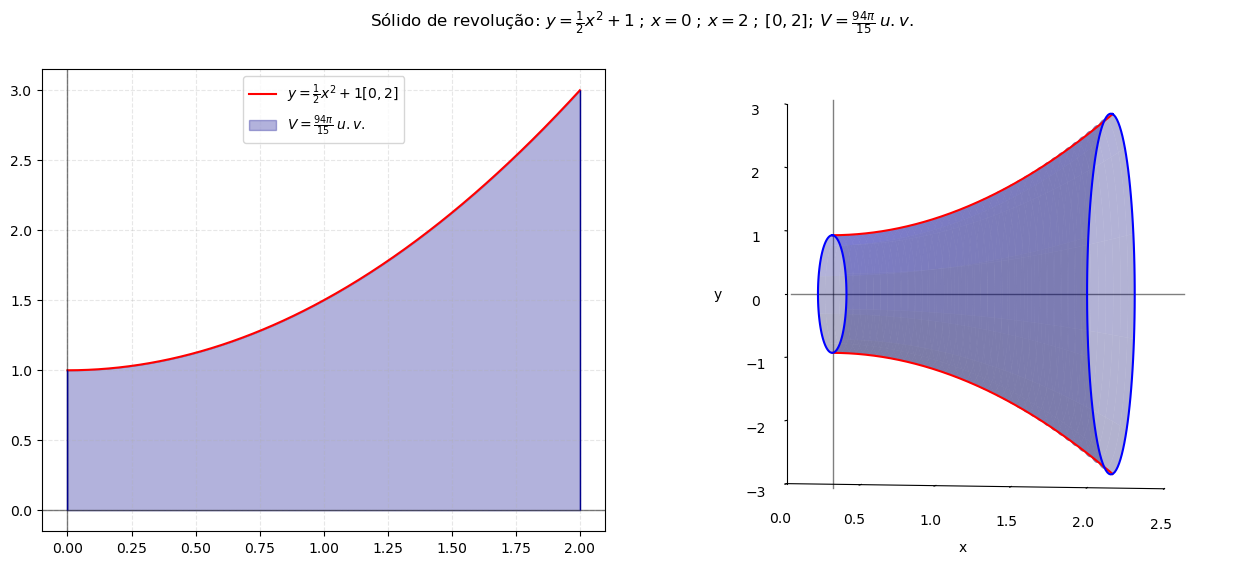

In [126]:
# Plotando o gráfico

# Criando funções lambda para plotar
y_lambda = sp.lambdify(x, y, 'numpy')
# x_vals
x_vals = np.linspace(0, 2, 400)
# y_vals
y_vals = y_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 6))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y_vals, label=r'$y=\frac{1}{2}x^2+1 [0,2]$', color="red")
# Fill
ax1.fill_between(x_vals, y_vals, label=r'$V=\frac{94\pi}{15}\:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.axvline(0, color='black', alpha=0.5, linewidth=1)
ax1.vlines([0, 2], [0, 0], [1, 3], color='darkblue', linewidth=1, linestyle='-', zorder=3)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
Y = y_lambda(X) * np.cos(T)
Z = y_lambda(X) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='blue', alpha=0.3, rstride=10, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
for xi in [0, 2]:
    yi = y_lambda(xi)
    theta_circ = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='blue', zorder=3)
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=10, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.3) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(0, 2.5)
ax2.set_ylim(-3, 3)
ax2.set_zlim(-3, 3)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(-0.3, 2.5, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(-3.3, 3.3, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y=\frac{1}{2}x^2+1\:;\:x=0\:;\:x=2\:;\:[0,2];\:V=\frac{94\pi}{15}\:u.v.$')
plt.show()

## Questão 3
$y=x^2\:;\:x=\sqrt{y}\:;\:0\le y\le 4$

In [127]:
# Definindo a variável simbólica
y = sp.Symbol('y')

# Definindo a função
x = sp.sqrt(y)

# Calculando o volume
V = sp.pi*sp.integrate(x**2, (y, 0, 4))
V

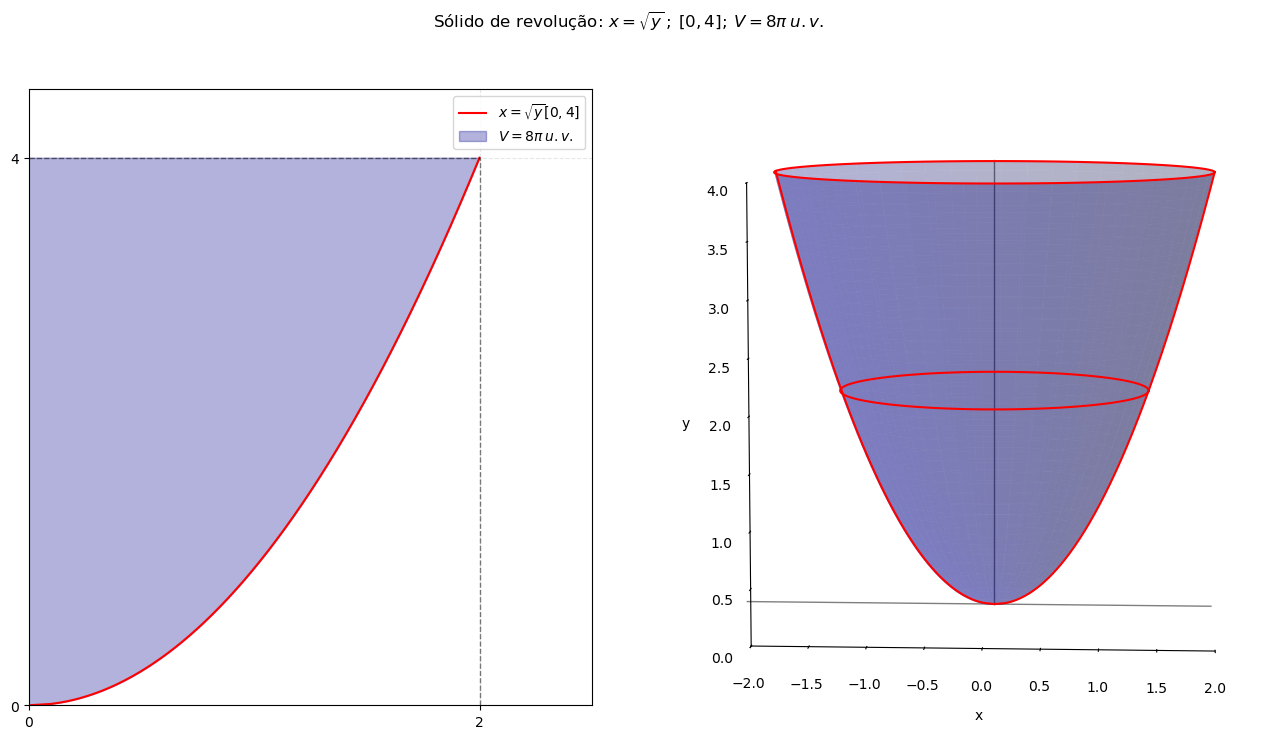

In [128]:
# Plotando o gráfico

# Criando funções lambda para plotar
x_lambda = sp.lambdify(y, x, 'numpy')
# y_vals
y_vals = np.linspace(0, 4, 400)
# x_vals
x_vals = x_lambda(y_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 8))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y_vals, label=r'$x=\sqrt{y} [0,4]$', color="red")
ax1.fill_betweenx(y_vals, x_vals, where=(y_vals>=0)&(y_vals<=4), label=r'$V=8\pi \:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.hlines(4, 0, 2, color='black', alpha=0.5, linewidth=1, linestyle='--')
ax1.vlines(2, 0, 4, color='black', alpha=0.5, linewidth=1, linestyle='--')
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 4.5)
ax1.set_xticks([0, 2], ['0', '2'])
ax1.set_yticks([0, 4], ['0', '4'])
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
theta = np.linspace(0, 2*np.pi, 100)
Y, T = np.meshgrid(y_vals, theta)
X = x_lambda(Y) * np.cos(T)
Z = x_lambda(Y) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='darkblue', alpha=0.3, rstride=2, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(-x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos na borda
yi = 4
xi = x_lambda(yi)
theta_circ = np.linspace(0, 2*np.pi, 100)
x_circ = xi * np.cos(theta_circ)
z_circ = xi * np.sin(theta_circ)
y_circ = np.full_like(theta_circ, yi) # constante
ax2.plot(x_circ, y_circ, z_circ, color='red', zorder=3)
# Círculo no meio
yi = 2
xi = x_lambda(yi)
theta_circ = np.linspace(0, 2*np.pi, 100)
x_circ = xi * np.cos(theta_circ)
z_circ = xi * np.sin(theta_circ)
y_circ = np.full_like(theta_circ, yi) # constante
ax2.plot(x_circ, y_circ, z_circ, color='red', zorder=3)
# Ajustando o ângulo da câmera
ax2.view_init(elev=7, azim=3, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.3) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(-2, 2)
ax2.set_ylim(0, 4)
ax2.set_zlim(-2, 2)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(-2.3, 2, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(0, 4.1, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $x=\sqrt{y}\:;\:[0,4];\:V=8\pi \:u.v.$')
plt.show()

## Questão 5
$y^2=2x\:;\:y=\pm\sqrt{2x}\:;\:x=2\:;\:[0,2]$

In [129]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y1 = sp.sqrt(2*x)
y2 = -sp.sqrt(2*x)

# Calculando o volume
V = sp.pi*sp.integrate(y1**2, (x, 0, 2)) # Só a parte positiva
V

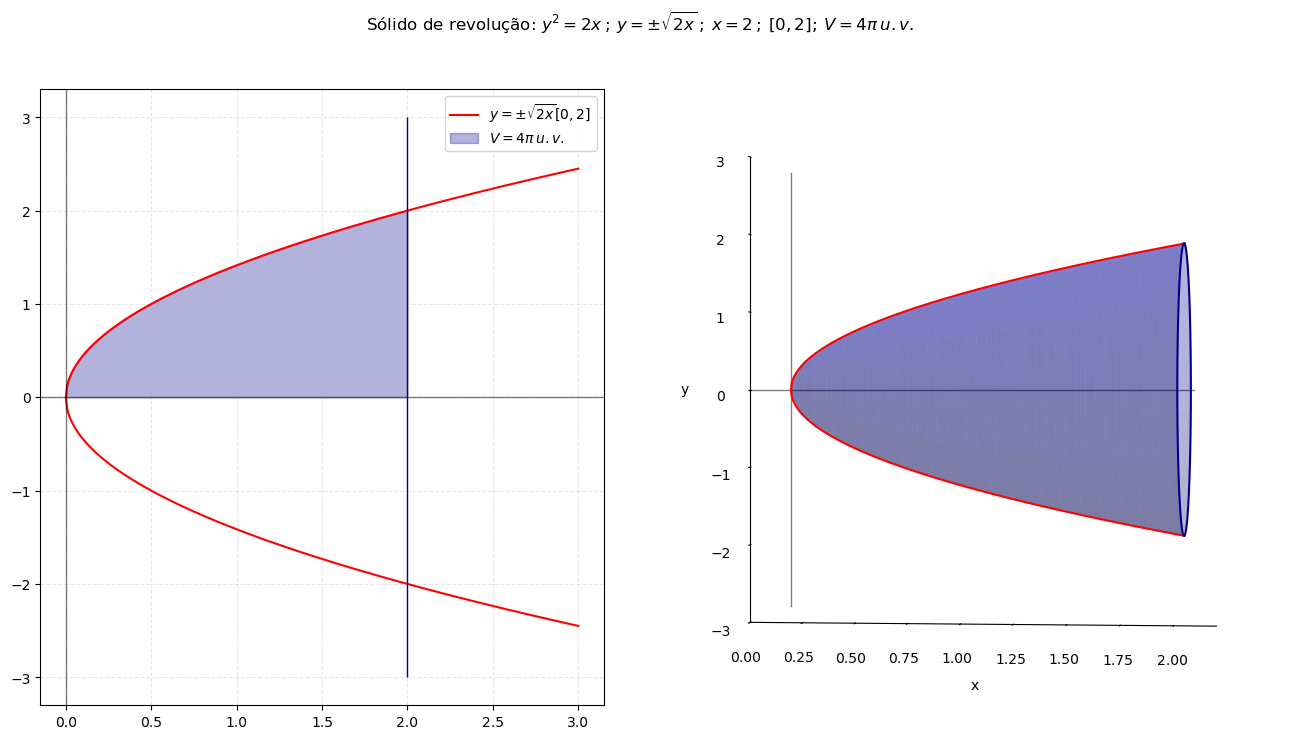

In [130]:
# Plotando o gráfico

# Criando funções lambda para plotar
y1_lambda = sp.lambdify(x, y1, 'numpy')
y2_lambda = sp.lambdify(x, y2, 'numpy')

# x_vals
x_vals = np.linspace(0, 3, 400)
# y_vals
y1_vals = y1_lambda(x_vals)
y2_vals = y2_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 8))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y1_vals, label=r'$y=\pm\sqrt{2x}[0,2]$', color="red")
ax1.plot(x_vals, y2_vals, color="red")
# Fill
ax1.fill_between(x_vals, y1_vals, where=(x_vals>=0)&(x_vals<=2), label=r'$V=4\pi \:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.axvline(0, color='black', alpha=0.5, linewidth=1)
ax1.vlines(2, -3, 3, color='darkblue', linewidth=1, linestyle='-', zorder=3)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
x_vals = np.linspace(0, 2, 400)
y_vals = y1_lambda(x_vals)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
Y = y1_lambda(X) * np.cos(T)
Z = y1_lambda(X) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='blue', alpha=0.3, rstride=8, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
xi = 2
yi = y1_lambda(xi)
theta_circ = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='darkblue', zorder=3)
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=6, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.3) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(0, 2.2)
ax2.set_ylim(-3, 3)
ax2.set_zlim(-3, 3)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(-0.22, 2.05, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(-3, 3, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y^2=2x\:;\:y=\pm\sqrt{2x}\:;\:x=2\:;\:[0,2];\:V=4\pi \:u.v.$')
plt.show()

## Questão 6
$y_1^2=2x\to y_1=\sqrt{2x}\:;\:y_2=x\:;\:[0,2]$

In [131]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y1 = sp.sqrt(2*x)
y2 = -sp.sqrt(2*x)
y3 = x

# Calculando o volume
# Volume do sólido de revolução entre y1 e y3
V = sp.pi*sp.integrate(y1**2-y3**2, (x, 0, 2))
V

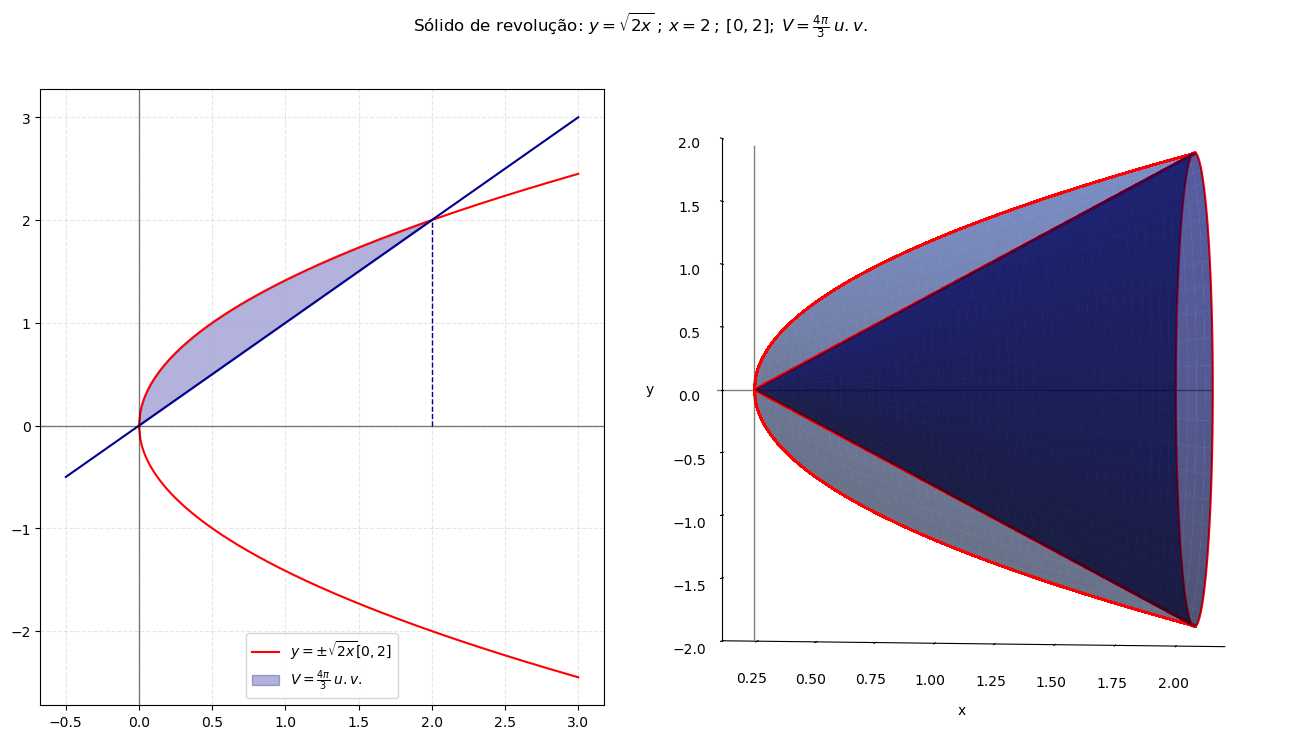

In [132]:
# Plotando o gráfico

# Criando funções lambda para plotar
y1_lambda = sp.lambdify(x, y1, 'numpy')
y2_lambda = sp.lambdify(x, y2, 'numpy')
y3_lambda = sp.lambdify(x, y3, 'numpy')

# x_vals
x_vals = np.linspace(-0.5, 3, 400)
x_pos = np.where(x_vals > 0, x_vals, 0)
# y_vals
y1_vals = y1_lambda(x_pos)
y2_vals = y2_lambda(x_pos)
y3_vals = y3_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 8))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_pos, y1_vals, label=r'$y=\pm\sqrt{2x}[0,2]$', color="red")
ax1.plot(x_pos, y2_vals, color="red")
ax1.plot(x_vals, y3_vals, color="darkblue")
# Fill
ax1.fill_between(x_vals, y1_vals, y3_vals, where=(x_vals>=0)&(x_vals<=2), label=r'$V=\frac{4\pi}{3}\:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.axvline(0, color='black', alpha=0.5, linewidth=1)
ax1.vlines(2, 0, 2, color='darkblue', linewidth=1, linestyle='--', zorder=3)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
x_vals = np.linspace(0, 2, 400)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
# Criando 2 sólidos diferentes
y1_lambda = sp.lambdify(x, y1, 'numpy')
y3_lambda = sp.lambdify(x, y3, 'numpy')
R = y1_lambda(X) # raio externo
r = y3_lambda(X) # raio interno
Y_ext = R * np.cos(T)
Z_ext = R * np.sin(T)
Y_int = r * np.cos(T)
Z_int = r * np.sin(T)
# Superfície externa (azul clara)
ax2.plot_surface(X, Y_ext, Z_ext, color='royalblue', alpha=0.4, linewidth=0)
# Superfície interna (azul escura)
ax2.plot_surface(X, Y_int, Z_int, color='darkblue', alpha=0.5, linewidth=0)
# Contornos
# ax2.plot(x_vals, r, np.zeros_like(x_vals), color='red')
# ax2.plot(x_vals, -r, np.zeros_like(x_vals), color='red')
ax2.plot(x_vals, R, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -R, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
xi = 2
yi = y1_lambda(xi)
theta_circ = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='red', zorder=3)

# Aparência
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=8, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.4) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(0.1, 2.2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(-2, 2)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(-0.2, 2.07, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(-2.15, 2.1, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y=\sqrt{2x}\:;\:x=2\:;\:[0,2];\:V=\frac{4\pi}{3}\:u.v.$')
plt.show()

## Questão 7
$y=x^2\:;\:x=2\:;\:[0,2]$

In [133]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y = x**2

# Calculando o volume
V = sp.pi*sp.integrate(y**2, (x, 0, 2))
V

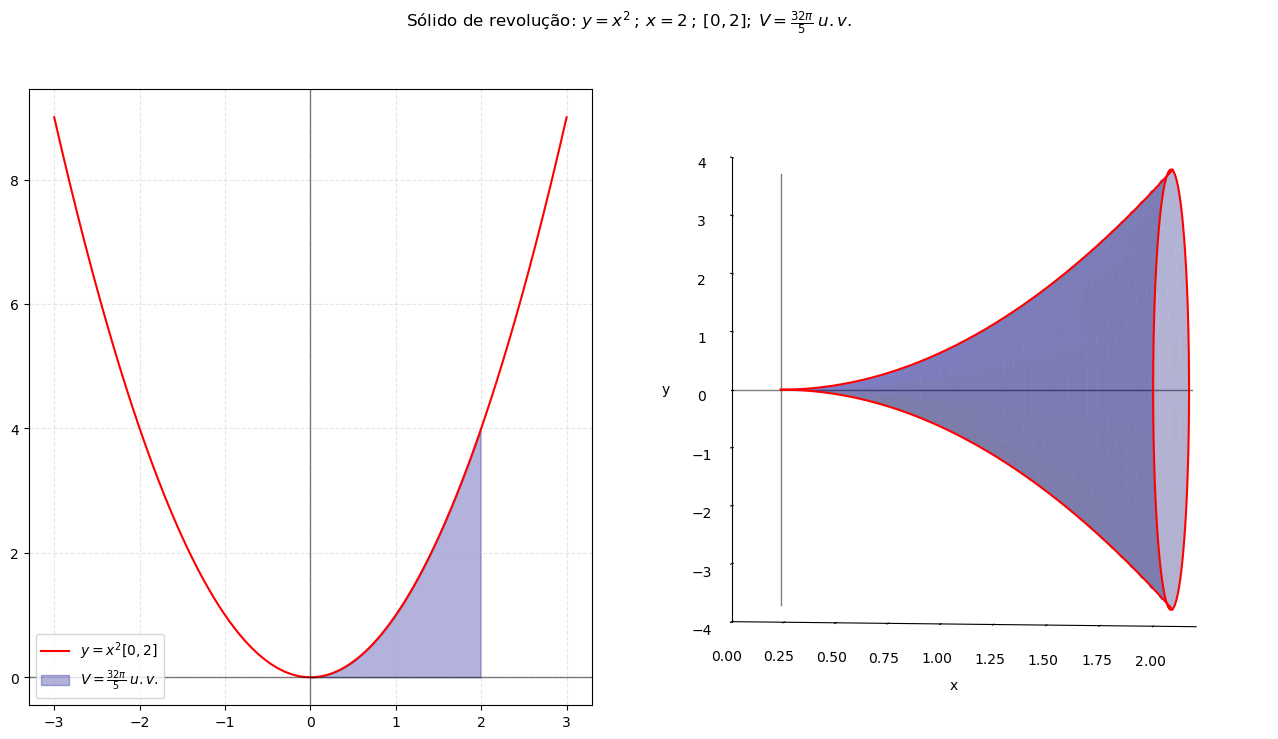

In [134]:
# Plotando o gráfico

# Criando funções lambda para plotar
y_lambda = sp.lambdify(x, y, 'numpy')
# x_vals
x_vals = np.linspace(-3, 3, 400)
# y_vals
y_vals = y_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 8))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y_vals, label=r'$y=x^2 [0,2]$', color="red")
# Fill
ax1.fill_between(x_vals, y_vals, where=(x_vals>=0)&(x_vals<=2), label=r'$V=\frac{32\pi}{5}\:u.v.$', color='darkblue', alpha=0.3)
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.axvline(0, color='black', alpha=0.5, linewidth=1)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
x_vals = np.linspace(0, 2, 400)
y_vals = y_lambda(x_vals)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
Y = y_lambda(X) * np.cos(T)
Z = y_lambda(X) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='blue', alpha=0.3, rstride=10, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
xi = 2
yi = y_lambda(xi)
theta_circ = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='red', zorder=3)
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=8, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.3) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(0, 2.2)
ax2.set_ylim(-4, 4)
ax2.set_zlim(-4, 4)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(-0.25, 2.1, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(-4, 4, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y=x^2\:;\:x=2\:;\:[0,2];\:V=\frac{32\pi}{5}\:u.v.$')
plt.show()

## Questão 8
$y=\sin{x}\:;\:x=\frac{\pi}{3}\:;\:[0,2]$

In [135]:
# Definindo a variável simbólica
x = sp.Symbol('x')

# Definindo a função
y = sp.sin(x)

# Calculando o volume
# Volume do sólido de revolução entre y
V = sp.pi*sp.integrate(y**2, (x, 0, sp.pi/3))
V

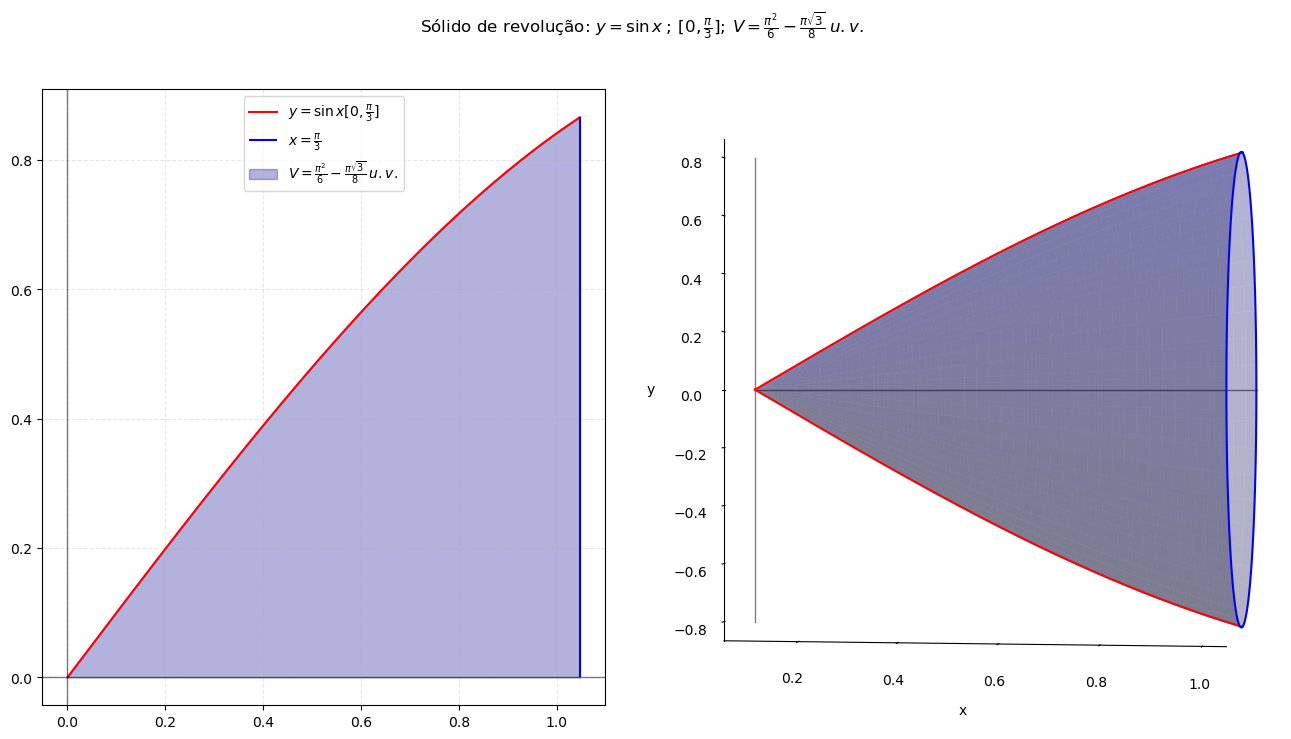

In [160]:
# Plotando o gráfico

# Funções lambda e valores de x e y
y_lambda = sp.lambdify(x, y, 'numpy')
# x_vals
x_vals = np.linspace(0, np.pi/3, 400)
# y_vals
y_vals = y_lambda(x_vals)

# Criando o gráfico
fig = plt.figure(figsize=(16, 8))

# Subgráfico 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x_vals, y_vals, label=r'$y=\sin{x}[0,\frac{\pi}{3}]$', color="red")
# Eixos x, y
ax1.axhline(0, color='black', alpha=0.5, linewidth=1)
ax1.axvline(0, color='black', alpha=0.5, linewidth=1)
ax1.vlines(np.pi/3, 0, np.sqrt(3)/2, color='blue', linewidth=1.5, linestyle='-', zorder=3, label=r'$x=\frac{\pi}{3}$')
# Fill
ax1.fill_between(x_vals, y_vals, label=r'$V=\frac{\pi^2}{6}-\frac{\pi\sqrt{3}}{8}\:u.v.$', color='darkblue', alpha=0.3)
ax1.grid(linestyle='--', alpha=0.3)
ax1.legend()

# Subráfico 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# Criando os pontos do sólido de revolução (3d)
theta = np.linspace(0, 2*np.pi, 100)
X, T = np.meshgrid(x_vals, theta)
Y = y_lambda(X) * np.cos(T)
Z = y_lambda(X) * np.sin(T)
# Superfície
ax2.plot_surface(X, Y, Z, color='darkblue', alpha=0.3, rstride=2, cstride=10, linewidth=0)
# Curvas
ax2.plot(x_vals, y_vals, np.zeros_like(x_vals), color='red', zorder=3)
ax2.plot(x_vals, -y_vals, np.zeros_like(x_vals), color='red', zorder=3)
# Círculos nas extremidades
xi = np.pi/3
yi = y_lambda(xi)
theta_circ = np.linspace(0, 2*np.pi, 100)
ax2.plot(np.full_like(theta_circ, xi), yi*np.cos(theta_circ), yi*np.sin(theta_circ), color='blue', zorder=3)
# Aparência
# Ajustando o ângulo da câmera
ax2.view_init(elev=0, azim=8, vertical_axis='y')
# Labels só pra x e y
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# Retirando os ticks do eixo z
ax2.set_zticks([])
ax2.grid(False)
# Mantém as proporções x, y, z iguais
ax2.set_box_aspect([1, 1, 1], zoom=1.4) # zoom pra deixar no msm tamanho da fig 1 
ax2.set_xlim(0.05, np.pi/3)
ax2.set_ylim(-np.sqrt(3)/2, np.sqrt(3)/2)
ax2.set_zlim(-np.sqrt(3)/2, np.sqrt(3)/2)
# Remove o fundo cinza (os "panes")
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
# Remove também as bordas dos planos
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')
# Tirando a linha do eixo z
ax2.zaxis.line.set_color((1, 1, 1, 0))
# Plotando y = 0
x_line = np.linspace(0, np.pi/3+0.03, 100)
y_line = np.zeros_like(x_line)
z_line = np.zeros_like(x_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)
# Plotando x = 0
y_line = np.linspace(-np.sqrt(3)/2, np.sqrt(3)/2, 100)
x_line = np.zeros_like(y_line)
z_line = np.zeros_like(y_line)
ax2.plot(x_line, y_line, z_line, color='black', alpha=0.5, linewidth=1)

plt.suptitle(r'Sólido de revolução: $y=\sin{x}\:;\:[0,\frac{\pi}{3}];\:V=\frac{\pi^2}{6}-\frac{\pi\sqrt{3}}{8}\:u.v.$')
plt.show()